# Loading the data

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


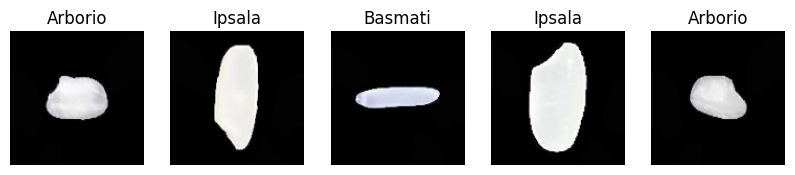

In [1]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image

# Path to the dataset directory
dataset_dir = r'C:\Users\Gowtham Ravuri\OneDrive\Desktop\Rice Classification Project\Rice_Image_Dataset'  # Using raw string

# Parameters
img_height, img_width = 128, 128
batch_size = 32
epochs = 5

# Data generators for training and validation with data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Preview a few images with labels
def preview_images(generator, num_images=5):
    class_names = list(generator.class_indices.keys())
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        ax = plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
    plt.show()

# Preview images from the training set
preview_images(train_generator)



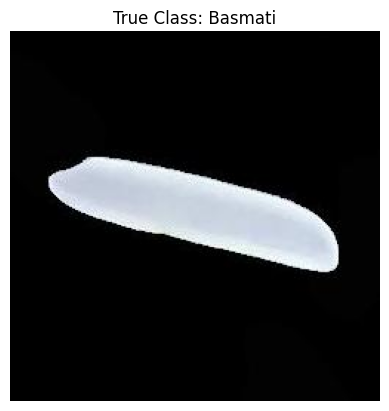

In [3]:
# Load and preprocess a random image from the dataset
def load_random_image(directory):
    class_names = os.listdir(directory)
    random_class = random.choice(class_names)
    class_dir = os.path.join(directory, random_class)
    random_image = random.choice(os.listdir(class_dir))
    img_path = os.path.join(class_dir, random_image)
    return img_path, random_class

img_path, true_class = load_random_image(dataset_dir)
img = load_img(img_path)
plt.imshow(img)
plt.title(f'True Class: {true_class}')
plt.axis('off')
plt.show()

# Resizing

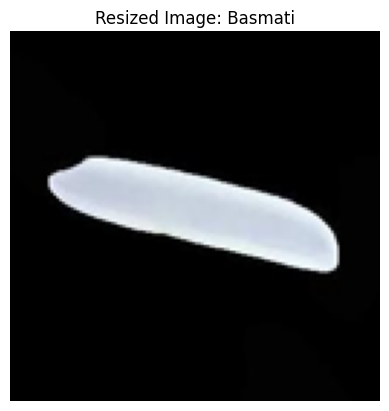

In [4]:
# Resizing the image
img_resized = img.resize((img_height, img_width))
plt.imshow(img_resized)
plt.title(f'Resized Image: {true_class}')
plt.axis('off')
plt.show()


# Normalization

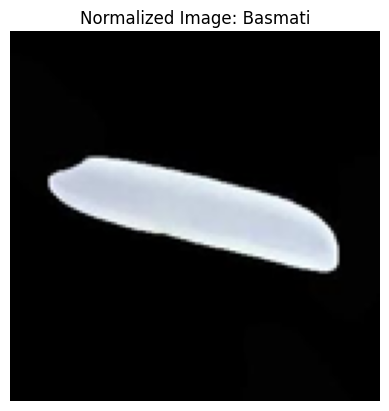

In [5]:
# Normalizing the image
img_array = img_to_array(img_resized) / 255.0
plt.imshow(img_array)
plt.title(f'Normalized Image: {true_class}')
plt.axis('off')
plt.show()



# Data Augumentation

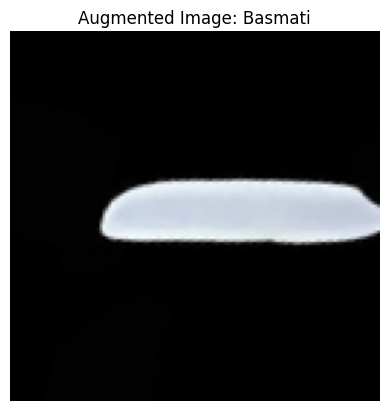

In [6]:
# Data augmentation example
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
img_augmented = datagen.random_transform(img_array)
plt.imshow(img_augmented)
plt.title(f'Augmented Image: {true_class}')
plt.axis('off')
plt.show()



# Denoising 

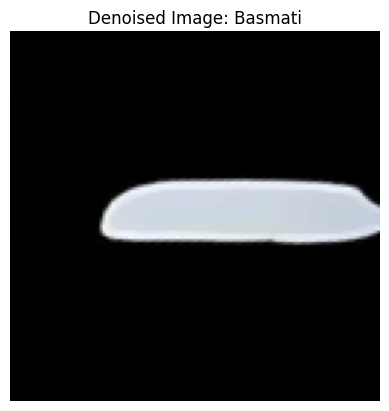

In [7]:
import cv2

# Denoising the image
img_denoised = cv2.fastNlMeansDenoisingColored((img_augmented * 255).astype(np.uint8), None, 10, 10, 7, 21)
plt.imshow(img_denoised)
plt.title(f'Denoised Image: {true_class}')
plt.axis('off')
plt.show()



# Edge Detection

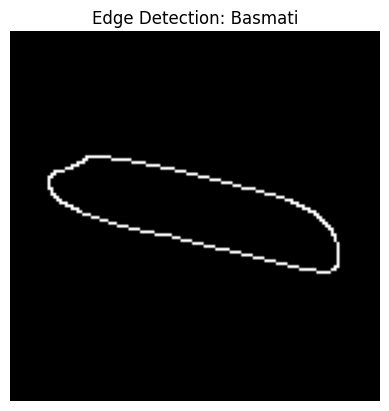

In [8]:
# Edge detection
import cv2
img_gray = cv2.cvtColor((img_array * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(img_gray, 100, 200)
plt.imshow(edges, cmap='gray')
plt.title(f'Edge Detection: {true_class}')
plt.axis('off')
plt.show()


# Color Space Conversion

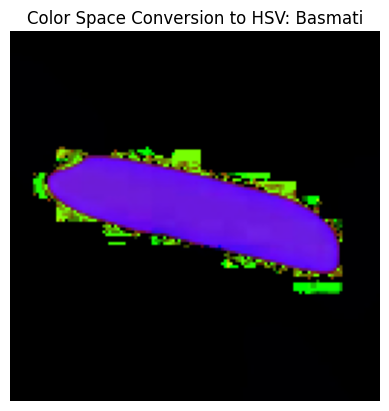

In [9]:
# Color space conversion to HSV
img_hsv = cv2.cvtColor((img_array * 255).astype(np.uint8), cv2.COLOR_RGB2HSV)
plt.imshow(img_hsv)
plt.title(f'Color Space Conversion to HSV: {true_class}')
plt.axis('off')
plt.show()



# Image Cropping

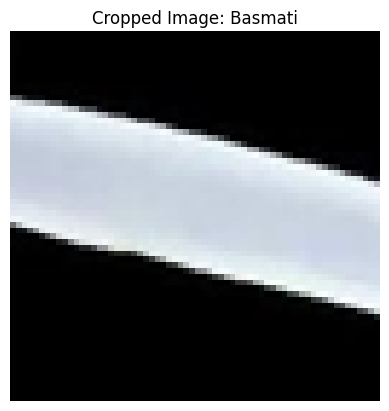

In [10]:
# Image cropping
start_row, start_col = int(img_height * .25), int(img_width * .25)
end_row, end_col = int(img_height * .75), int(img_width * .75)
img_cropped = img_array[start_row:end_row, start_col:end_col]
plt.imshow(img_cropped)
plt.title(f'Cropped Image: {true_class}')
plt.axis('off')
plt.show()


# Batch normalization

In [11]:
from tensorflow.keras.layers import BatchNormalization

# Create ImageDataGenerator instances for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)



# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)
# Evaluate the model and print the accuracy
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')


c:\Users\Gowtham Ravuri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


c:\Users\Gowtham Ravuri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 669s 356ms/step - accuracy: 0.8293 - loss: 0.4227 - val_accuracy: 0.9792 - val_loss: 0.0575
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 480s 256ms/step - accuracy: 0.9737 - loss: 0.0833 - val_accuracy: 0.9774 - val_loss: 0.0668
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 471s 251ms/step - accuracy: 0.9794 - loss: 0.0649 - val_accuracy: 0.9896 - val_loss: 0.0331
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 641s 342ms/step - accuracy: 0.9843 - loss: 0.0509 - val_accuracy: 0.9877 - val_loss: 0.0414
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 462s 246ms/step - accuracy: 0.9856 - loss: 0.0453 - val_accuracy: 0.9952 - val_loss: 0.0120
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 113ms/step - accuracy: 0.9943 - loss: 0.0180
Validation Accuracy: 99.51%


# prediction with trained model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


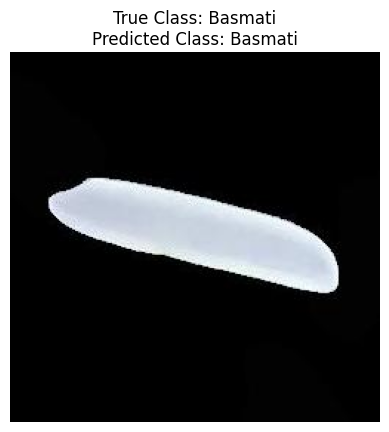

Predicted Class: Basmati
True Class: Basmati


In [12]:
# Predict with the trained model using a random example image
img_preprocessed = np.expand_dims(img_array, axis=0)
predictions = model.predict(img_preprocessed)
predicted_class_index = np.argmax(predictions, axis=1)
predicted_class = list(train_generator.class_indices.keys())[predicted_class_index[0]]

# Display the prediction result
plt.imshow(img)
plt.title(f'True Class: {true_class}\nPredicted Class: {predicted_class}')
plt.axis('off')
plt.show()

print(f'Predicted Class: {predicted_class}')
print(f'True Class: {true_class}')


# Hyperparameter Tuning

In [15]:
import kerastuner as kt

# Define a hypermodel function
def build_model(hp):
    model = Sequential()
    model.add(Conv2D(
        filters=hp.Int('conv_1_filters', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
        activation='relu',
        input_shape=(img_height, img_width, 3)
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    for i in range(hp.Int('num_conv_layers', 1, 3)):
        model.add(Conv2D(
            filters=hp.Int(f'conv_{i+2}_filters', min_value=32, max_value=128, step=32),
            kernel_size=hp.Choice(f'conv_{i+2}_kernel', values=[3, 5]),
            activation='relu'
        ))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(BatchNormalization())
    model.add(Dense(len(train_generator.class_indices), activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Define the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=2,
    executions_per_trial=1,
    directory='my_dir',
    project_name='rice_grain_classification'
)

# Perform hyperparameter search
tuner.search(train_generator, epochs=2, validation_data=validation_generator)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build and train the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Evaluate the model and print the accuracy
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')

# Predict with the trained model using a random example image
img_preprocessed = np.expand_dims(img_array, axis=0)
predictions = model.predict(img_preprocessed)
predicted_class_index = np.argmax(predictions, axis=1)
predicted_class = list(train_generator.class_indices.keys())[predicted_class_index[0]]

# Display the prediction result
plt.imshow(img)
plt.title(f'True Class: {true_class}\nPredicted Class: {predicted_class}')
plt.axis('off')
plt.show()

print(f'Predicted Class: {predicted_class}')
print(f'True Class: {true_class}')


Reloading Tuner from my_dir\rice_grain_classification\tuner0.json

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
128               |32                |conv_1_filters
3                 |3                 |conv_1_kernel
1                 |2                 |num_conv_layers
128               |96                |conv_2_filters
3                 |5                 |conv_2_kernel
32                |64                |dense_units
0.3               |0.1               |dropout_rate
128               |32                |conv_3_filters
3                 |3                 |conv_3_kernel

Epoch 1/2
 675/1875 ━━━━━━━━━━━━━━━━━━━━ 36:38 2s/step - accuracy: 0.7533 - loss: 0.6927

KeyboardInterrupt: 

In [1]:
# Save the model
model.save('rice_grain_classifier.h5')

NameError: name 'model' is not defined